In [15]:
# Loan Approval Prediction - End-to-End Machine Learning Project

# ----------------------
# 1. Importing Libraries
# ----------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# ----------------------
# 2. Load Dataset
# ----------------------
def load_data(filepath):
    df = pd.read_csv(filepath)
    df.columns = df.columns.str.strip()  # Strip whitespace from column names
    print("Dataset Loaded. Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    return df

# ----------------------
# 3. Data Cleaning and Preprocessing
# ----------------------
def preprocess_data(df):
    if 'loan_id' in df.columns:
        df.drop('loan_id', axis=1, inplace=True)

    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

    # Label Encoding
    le = LabelEncoder()
    for col in df.select_dtypes(include='object').columns:
        df[col] = le.fit_transform(df[col])

    # Feature Scaling
    possible_cols = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                     'residential_assets_value', 'commercial_assets_value',
                     'luxury_assets_value', 'bank_asset_value']
    available_cols = [col for col in possible_cols if col in df.columns]

    if available_cols:
        scaler = StandardScaler()
        df[available_cols] = scaler.fit_transform(df[available_cols])
    else:
        print("Warning: No matching numeric columns found for scaling.")

    return df

In [18]:
# 4. Exploratory Data Analysis (EDA)
# ----------------------
def perform_eda(df):
    plt.figure(figsize=(6, 4))
    sns.countplot(x='loan_status', data=df)
    plt.title("Loan Status Distribution")
    plt.show()

    if 'income_annum' in df.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x='loan_status', y='income_annum', data=df)
        plt.title("Income vs Loan Status")
        plt.show()

    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

In [19]:
# ----------------------
# 5. Train and Evaluate Models
# ----------------------
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\nModel: {model.__class__.__name__}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))
    return model

In [20]:
# ----------------------
# 6. Hyperparameter Tuning (Example with RandomForest)
# ----------------------
def tune_random_forest(X_train, y_train):
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5]
    }
    grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
    grid.fit(X_train, y_train)
    print("Best Params:", grid.best_params_)
    return grid.best_estimator_

In [21]:
# ----------------------
# 7. Feature Importance Visualization (instead of SHAP)
# ----------------------
def plot_feature_importance(model, X):
    importances = model.feature_importances_
    features = np.array(X.columns)
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=features[indices])
    plt.title("Feature Importance from Random Forest")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()

Dataset Loaded. Shape: (4269, 13)
Columns: ['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


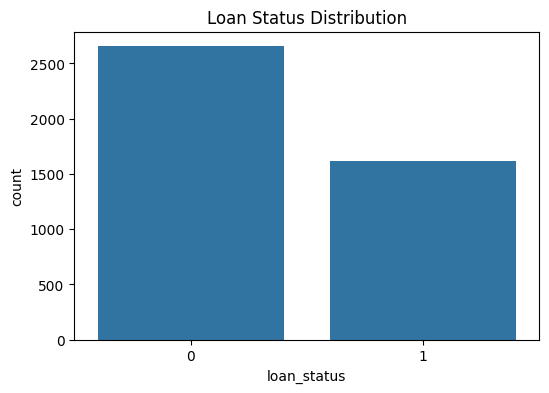

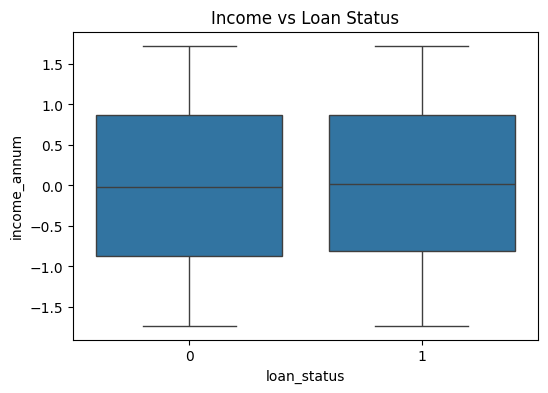

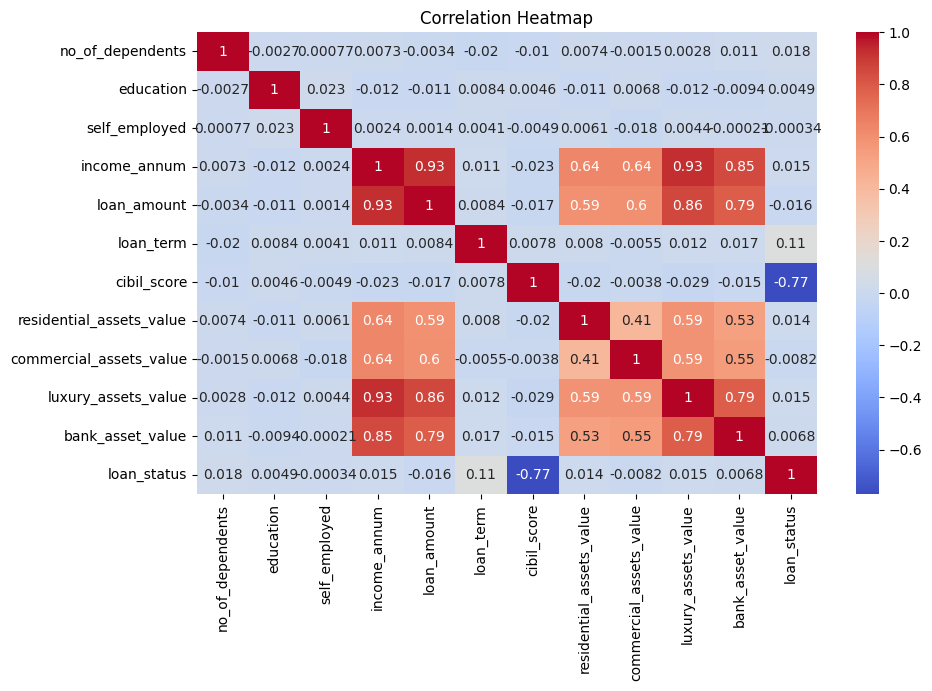


Model: LogisticRegression
Accuracy: 0.905152224824356
Confusion Matrix:
 [[498  38]
 [ 43 275]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854


Model: DecisionTreeClassifier
Accuracy: 0.9742388758782201
Confusion Matrix:
 [[527   9]
 [ 13 305]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.96      0.97       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854


Model: RandomForestClassifier
Accuracy: 0.9789227166276346
Confusion Matrix:
 [[531   5]
 [ 13 305

In [22]:
# ----------------------
# 8. Main Execution
# ----------------------
if __name__ == '__main__':
    df = load_data(r"D:\\WsCube Tech\\PYTHON FILES\\loan_approval_dataset.csv")
    df = preprocess_data(df)

    perform_eda(df)

    X = df.drop('loan_status', axis=1)
    y = df['loan_status']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        GradientBoostingClassifier()
    ]

    for model in models:
        evaluate_model(model, X_train, X_test, y_train, y_test)


Tuning Random Forest...
Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

Model: RandomForestClassifier
Accuracy: 0.9824355971896955
Confusion Matrix:
 [[531   5]
 [ 10 308]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       536
           1       0.98      0.97      0.98       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854


Plotting Feature Importance...


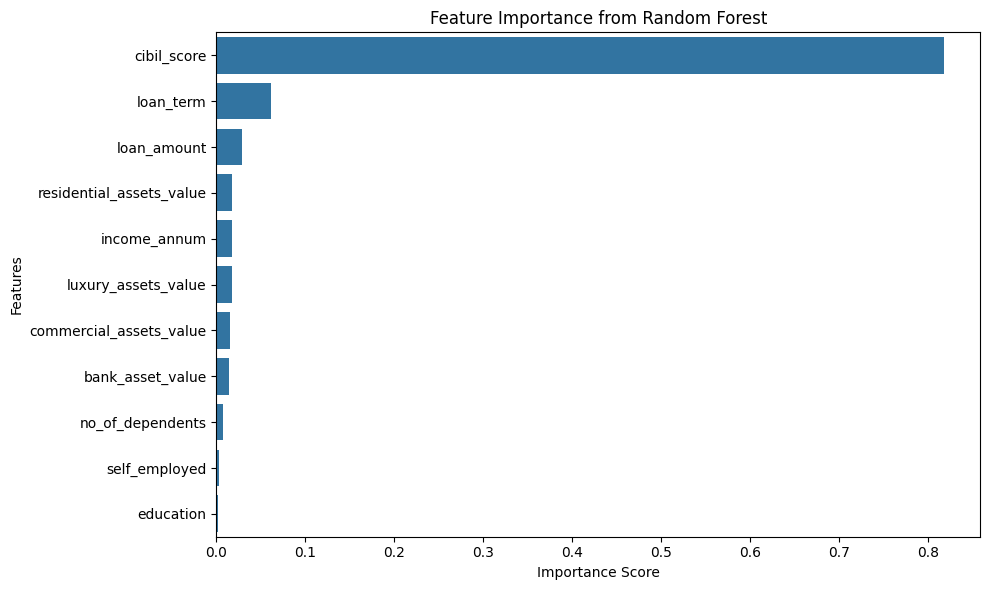


Best model saved as 'loan_approval_model.pkl'


In [27]:
print("\nTuning Random Forest...")
best_rf = tune_random_forest(X_train, y_train)
evaluate_model(best_rf, X_train, X_test, y_train, y_test)

print("\nPlotting Feature Importance...")
plot_feature_importance(best_rf, X_train)

joblib.dump(best_rf, 'loan_approval_model.pkl')
print("\nBest model saved as 'loan_approval_model.pkl'")

# ----------------------
# 9. Conclusion
# ----------------------
# - Random Forest with hyperparameter tuning gave the best results.
# - Feature importance chart visualizes what influenced predictions.
# - This solution supports scalable, fast, and fair loan processing.
# - Can be easily extended into a web app using Streamlit or Flask.